<a href="https://colab.research.google.com/github/VictorDreke/Data-Science-for-Finance/blob/master/AppleStockARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOADING LIBRARIES


In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Getting Apple stock quote from 2012/01/01 to 2020/05/16
dataset = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-16')
# Show the data
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-05-11,317.049988,307.239990,308.100006,315.010010,36405900.0,315.010010
2020-05-12,319.690002,310.910004,317.829987,311.410004,40575300.0,311.410004
2020-05-13,315.950012,303.209991,312.149994,307.649994,50155600.0,307.649994


## Plot graph of Apple Stock

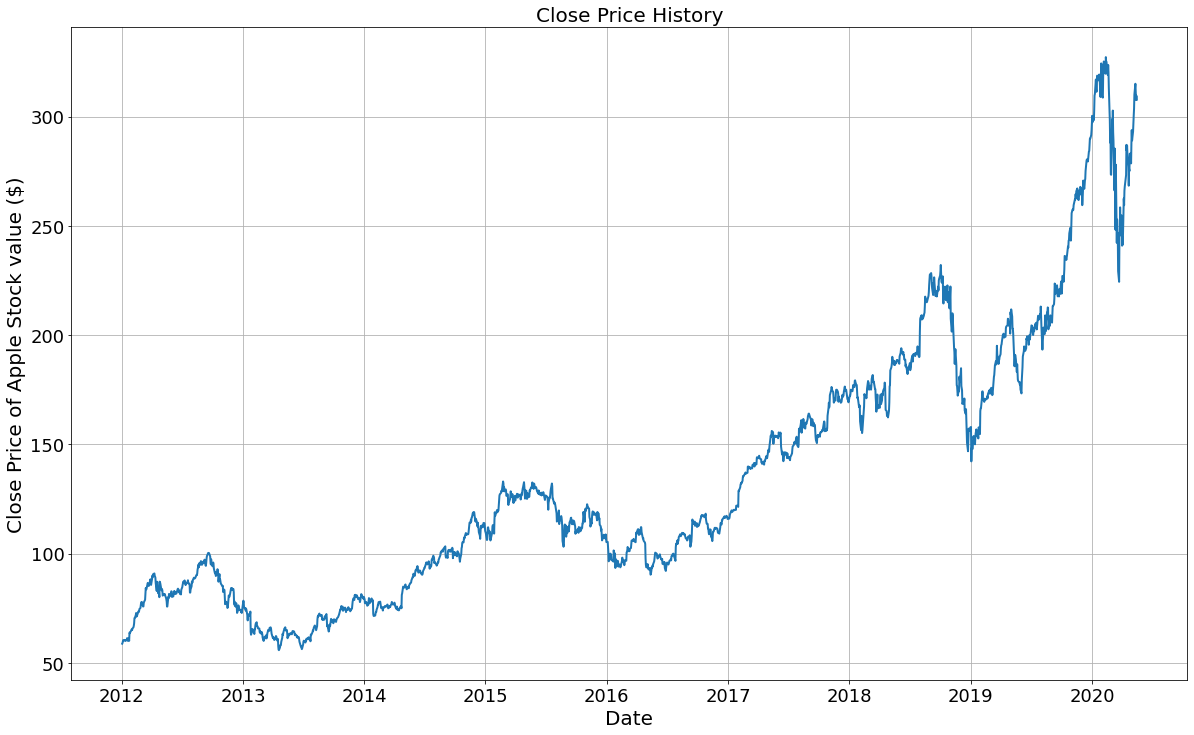

In [4]:
plt.figure(figsize=(20,12))
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Close Price of Apple Stock value ($)", fontsize=20)
plt.title('Close Price History', fontsize=20)
plt.plot(dataset['Close'], linewidth=2)
plt.grid()

## Determining rolling statistics
In this stage we make sure that the datais stacionary. Therefore, the data should have a constant mean and standard deviation. It is clear that data does not have a constant mean so we analize the in differents segments.

In [5]:
rolmean = dataset['Close'].rolling(window=45).mean()

rolstd = dataset['Close'].rolling(window=45).std()
print(rolmean, rolstd)


Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2020-05-11    269.563555
2020-05-12    270.568888
2020-05-13    271.064666
2020-05-14    271.822666
2020-05-15    273.144444
Name: Close, Length: 2106, dtype: float64 Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
                ...    
2020-05-11    21.977472
2020-05-12    22.836641
2020-05-13    23.399834
2020-05-14    24.086840
2020-05-15    24.392810
Name: Close, Length: 2106, dtype: float64


## Plot rolling statistics 
This way we make sure that selected window is correct.

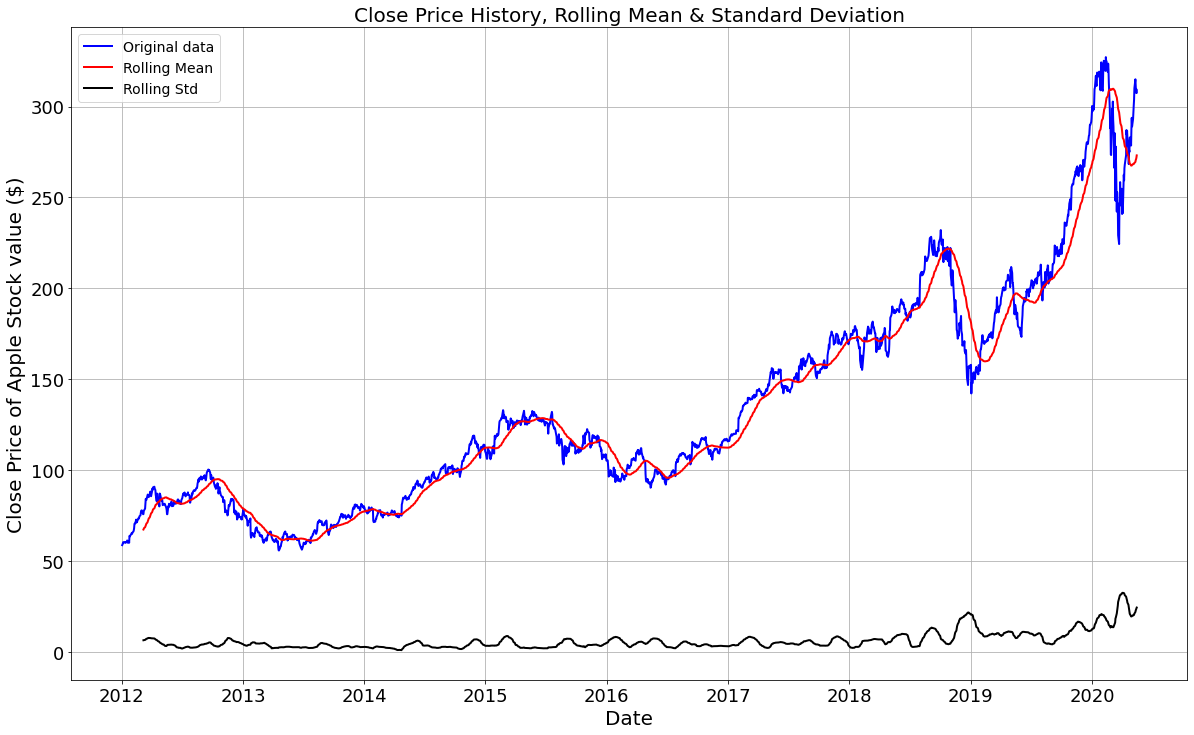

In [6]:
plt.figure(figsize=(20,12))
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Close Price of Apple Stock value ($)", fontsize=20)
plt.title('Close Price History, Rolling Mean & Standard Deviation', fontsize=20)
original = plt.plot(dataset['Close'], color='blue', label='Original data', linewidth=2)
mean = plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=2)
std = plt.plot(rolstd, color='black', label='Rolling Std', linewidth=2)
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show(block=False)

## Performing Dickey-Fuller test:
This test gives information about the suitability of the data for forescating. In this case, the null hypothesis is: the data is **not** stacionary. This is a two-tails test
Note:
 

*   If p-value > alpha: Fail to reject the null hypothesis
*   If p-value <= alpha reject the null hypothesis


*   If test statistic < critical value: Fail to reject the null hypothesis
*   If test statistic >= critical value: Reject the null hypothesis.






In [7]:
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test:')
DFtest = adfuller(dataset['Close'], autolag='AIC')

DFoutput = pd.Series(DFtest[0:4], index=['test Statistic', 'p-value', 'Flags used', 'Number of Observation used'])
for key, value in DFtest[4].items():
  DFoutput['Critical value (%s)'%key] = value

print(DFoutput)

Result of Dickey-Fuller Test:
test Statistic                   0.427263
p-value                          0.982486
Flags used                      26.000000
Number of Observation used    2079.000000
Critical value (1%)             -3.433499
Critical value (5%)             -2.862931
Critical value (10%)            -2.567511
dtype: float64


## Estimating trend

Date
2012-01-03    4.073243
2012-01-04    4.078602
2012-01-05    4.089643
2012-01-06    4.100043
2012-01-09    4.098455
                ...   
2020-05-11    5.752604
2020-05-12    5.741110
2020-05-13    5.728963
2020-05-14    5.735087
2020-05-15    5.729158
Name: Close, Length: 2106, dtype: float64

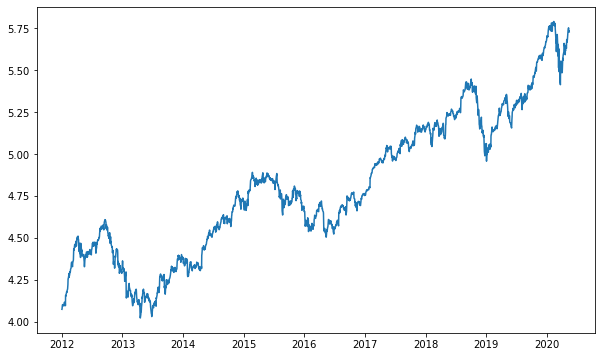

In [27]:
dataset_log = np.log(dataset['Close'])
plt.plot(dataset_log)

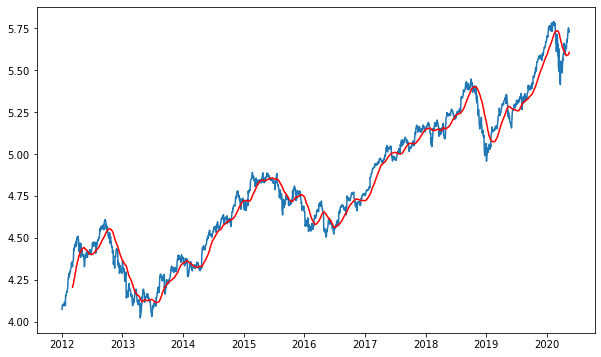

In [29]:
moving_average = dataset_log.rolling(window=45).mean()
moving_std = dataset_log.rolling(window=45).std()
plt.plot(dataset_log)
plt.plot(moving_average, color='red')

In [10]:
# Data preparation. 
# In this case to make the trend stationary, we restthe data minus the moving average.
dataset_log_minus_moving_average = dataset_log - moving_average
dataset_log_minus_moving_average.head(12)

# Remove NaN values
dataset_log_minus_moving_average.dropna(inplace=True)
# dataset_log_minus_moving_average.head(45)

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stacionarity(timeseries, wdw=45):

  # Determing rolling statistics
  moving_average = timeseries.rolling(window=wdw).mean()
  moving_std = timeseries.rolling(window=wdw).std()

  # Plot rolling statistics
  plt.figure(figsize=(20,12))
  plt.xlabel("Date", fontsize=20)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.ylabel("Close Price of Apple Stock value ($)", fontsize=20)
  plt.title('Close Price History, Rolling Mean & Standard Deviation', fontsize=20)
  original = plt.plot(timeseries, color='blue', label='Original data', linewidth=2)
  mean = plt.plot(moving_average, color='red', label='Rolling Mean', linewidth=2)
  std = plt.plot(moving_std, color='black', label='Rolling STD', linewidth=2)
  plt.legend(loc='best', fontsize=14)
  plt.grid()
  plt.show(block=False)

  # Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller test:')
  DFtest = adfuller(timeseries, autolag='AIC')
  DFoutput = pd.Series(DFtest[0:4], index=['test Statistic', 'p-value', 'Flags used', 'Number of Observation used'])
  for key, value in DFtest[4].items():
    DFoutput['Critical value (%s)'%key] = value
  print(DFoutput)
  




## Data Transformations to assess the stationarity of the data

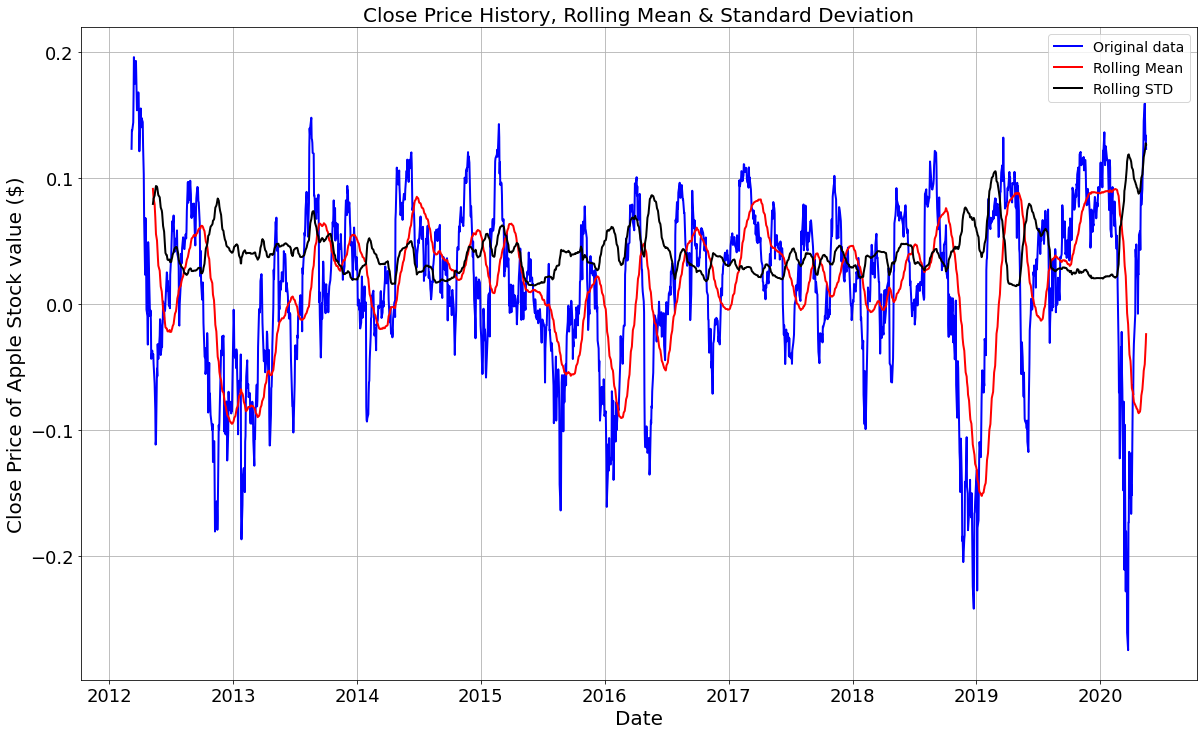

Results of Dickey-Fuller test:
test Statistic               -7.360203e+00
p-value                       9.544650e-11
Flags used                    2.000000e+01
Number of Observation used    2.041000e+03
Critical value (1%)          -3.433558e+00
Critical value (5%)          -2.862957e+00
Critical value (10%)         -2.567524e+00
dtype: float64


In [20]:
test_stacionarity(dataset_log_minus_moving_average, wdw=45)

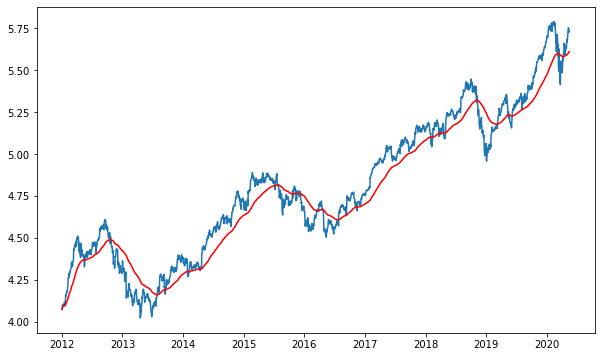

In [21]:
# To see the trend of timeseries,  we ddo the following
exponential_dedacy_weighted_average = dataset_log.ewm(halflife=45, min_periods=0, adjust=True).mean()
plt.plot(dataset_log)
plt.plot(exponential_dedacy_weighted_average, color='red')

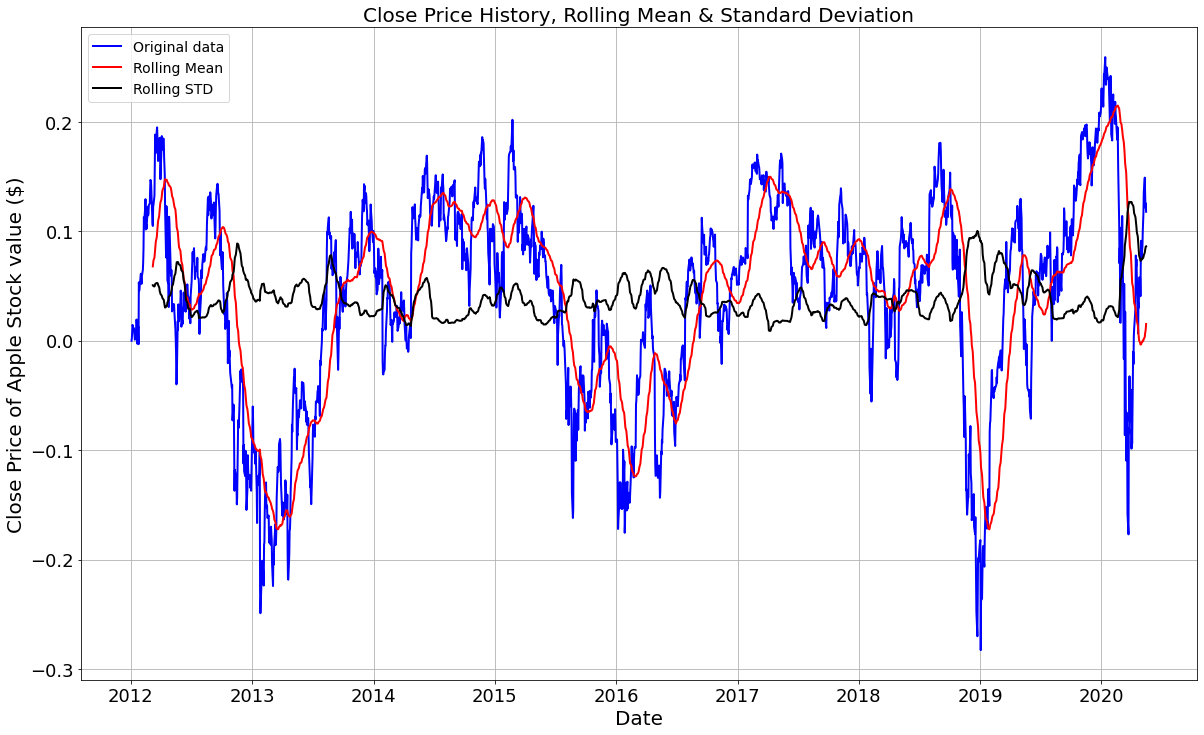

Results of Dickey-Fuller test:
test Statistic                  -3.967111
p-value                          0.001593
Flags used                      15.000000
Number of Observation used    2090.000000
Critical value (1%)             -3.433483
Critical value (5%)             -2.862924
Critical value (10%)            -2.567507
dtype: float64


In [22]:
test_stacionarity(dataset_log - exponential_dedacy_weighted_average)

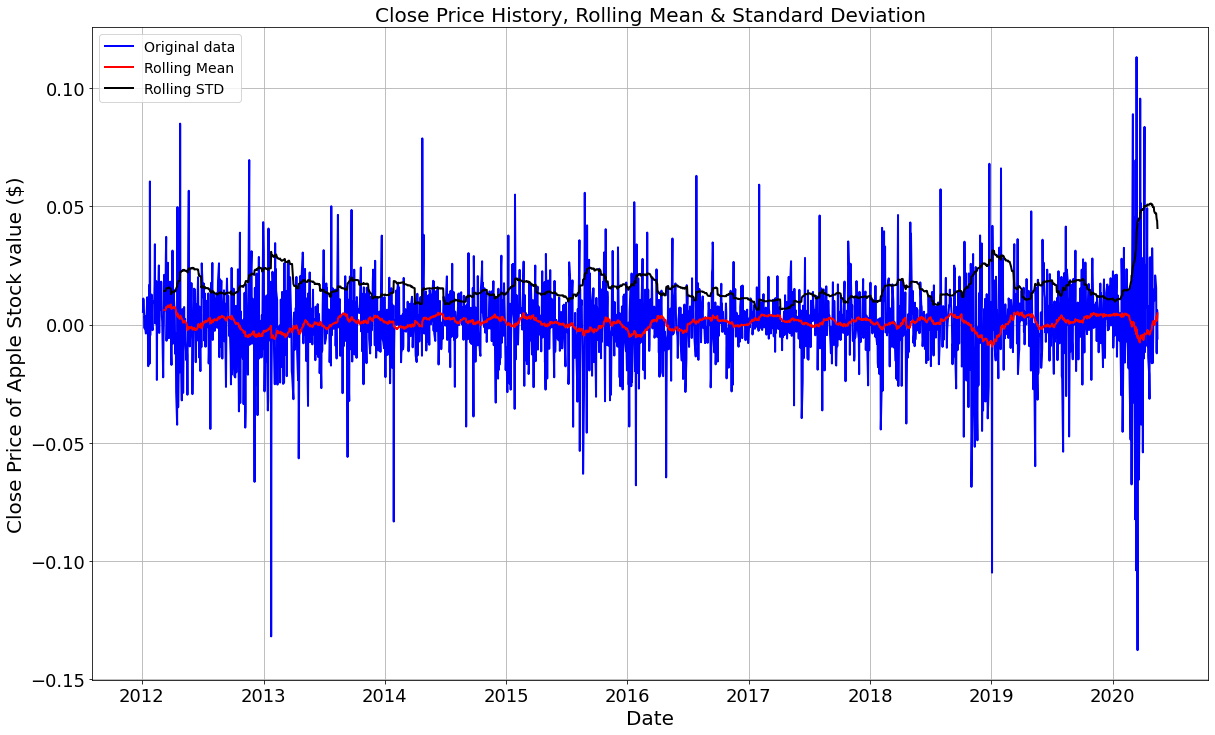

Results of Dickey-Fuller test:
test Statistic               -1.128437e+01
p-value                       1.430087e-20
Flags used                    1.400000e+01
Number of Observation used    2.090000e+03
Critical value (1%)          -3.433483e+00
Critical value (5%)          -2.862924e+00
Critical value (10%)         -2.567507e+00
dtype: float64


In [23]:
dataset_log_diff_shifting = dataset_log - dataset_log.shift()
dataset_log_diff_shifting.dropna(inplace=True)
test_stacionarity(dataset_log_diff_shifting)


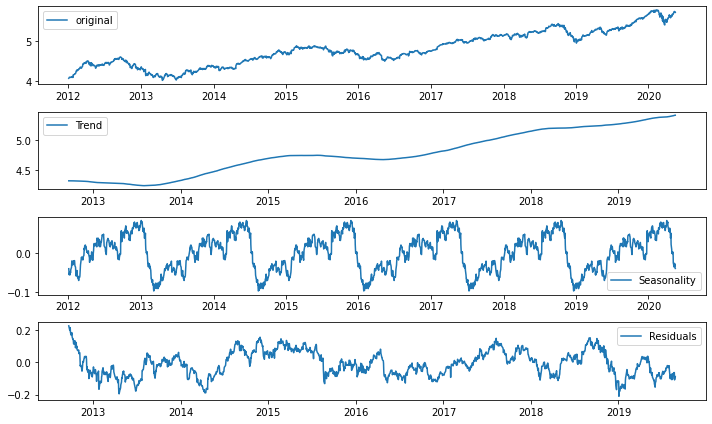

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition  = seasonal_decompose(dataset_log, freq=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset_log, label='original')
plt.legend(loc='best')


plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')


plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')


plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

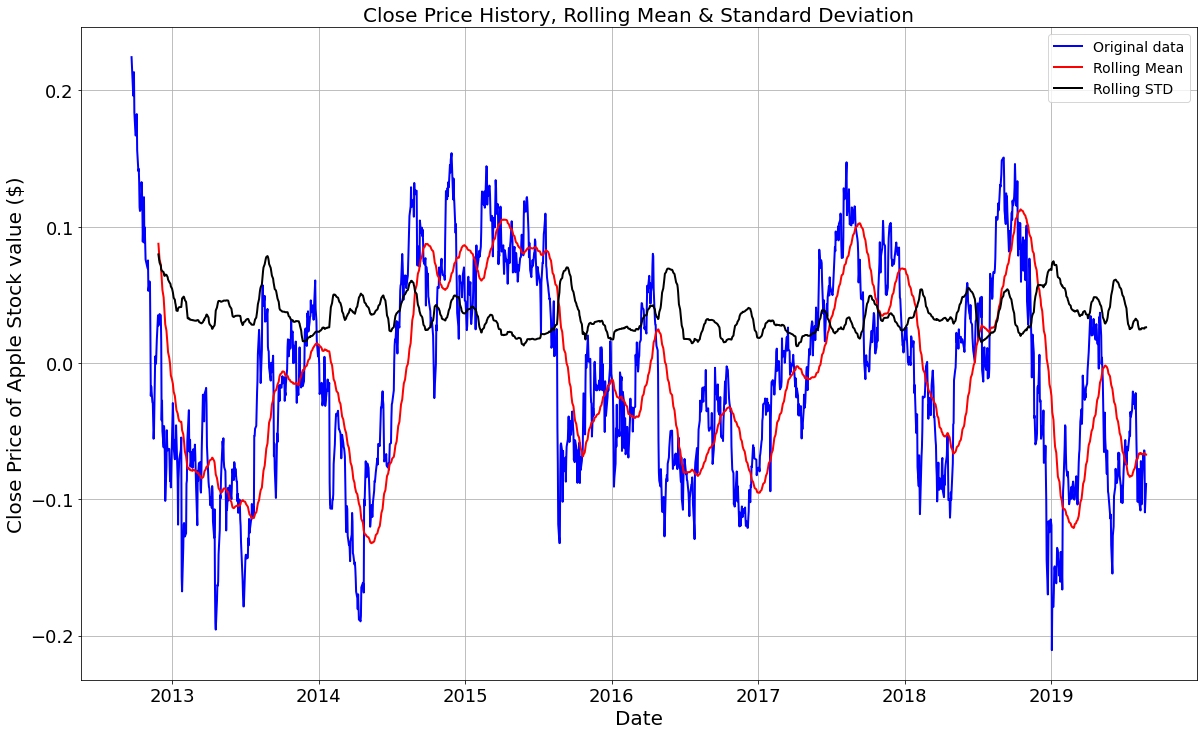

Results of Dickey-Fuller test:
test Statistic                  -3.978327
p-value                          0.001528
Flags used                      11.000000
Number of Observation used    1730.000000
Critical value (1%)             -3.434136
Critical value (5%)             -2.863212
Critical value (10%)            -2.567660
dtype: float64


In [49]:
residual.dropna(inplace=True)
test_stacionarity(residual)

## Plotting ACF and PACF graphs to determining the values of P, Q, I


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


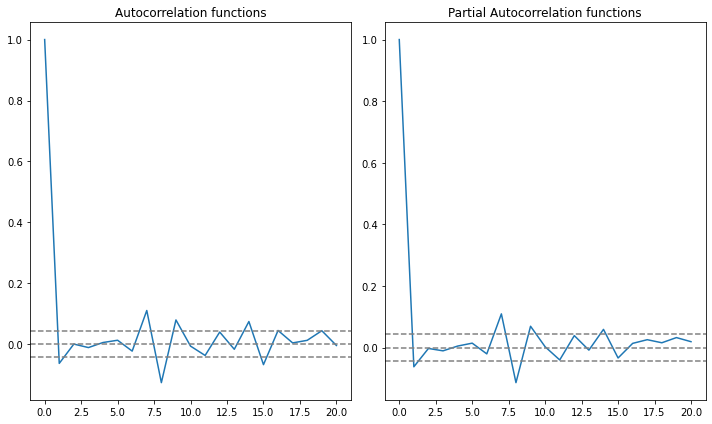

In [52]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataset_log_diff_shifting, nlags=20)
lag_pacf = pacf(dataset_log_diff_shifting, nlags=20, method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_log_diff_shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_log_diff_shifting)), linestyle='--', color='gray')
plt.title('Autocorrelation functions')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_log_diff_shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_log_diff_shifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation functions')
plt.tight_layout()

In order to calculate the P and Q, we need to check where the graphs drops to zero for the first time. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR


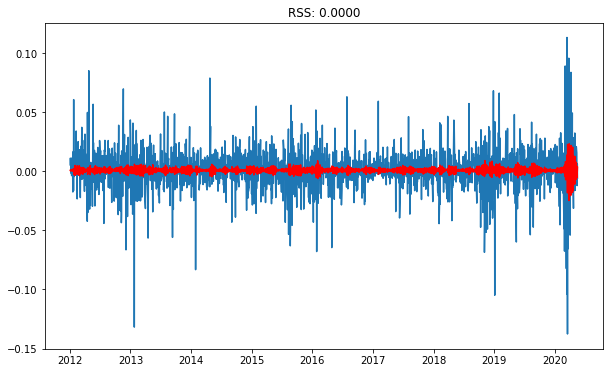

In [57]:
from statsmodels.tsa.arima_model import ARIMA

# AR model
model = ARIMA(dataset_log, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(dataset_log_diff_shifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dataset_log_diff_shifting)) ** 2)
print('Plotting AR model')

## Transforming the predictions

In [61]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
# print(predictions_ARIMA_diff)
# Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dataset_log)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)


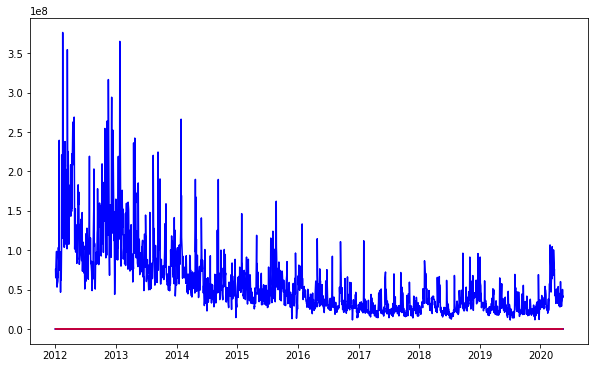

In [64]:
plt.plot(dataset, color='blue')
plt.plot(predictions_ARIMA, color='red')

In [65]:
results_AR.forecast(steps=120)

(array([5.72662964, 5.7315172 , 5.72815118, 5.73244392, 5.73090104,
        5.73253571, 5.73398276, 5.73281672, 5.73642399, 5.73404984,
        5.73778263, 5.73630661, 5.73834226, 5.73902158, 5.73883548,
        5.74142903, 5.73993151, 5.74306026, 5.74183543, 5.74398845,
        5.74422851, 5.74470686, 5.74653773, 5.7457672 , 5.74832278,
        5.74743344, 5.74952686, 5.74956106, 5.75045697, 5.75174355,
        5.75154429, 5.7535985 , 5.7530625 , 5.75499838, 5.75498258,
        5.75611243, 5.75703355, 5.75726087, 5.75890274, 5.7586974 ,
        5.76043321, 5.76046329, 5.7616977 , 5.76239227, 5.7629215 ,
        5.7642418 , 5.76432283, 5.76585245, 5.7659802 , 5.76723369,
        5.76780421, 5.76853412, 5.7696161 , 5.76993073, 5.77126991,
        5.77151648, 5.77273722, 5.77325532, 5.77410784, 5.77502257,
        5.77551802, 5.77669385, 5.77706046, 5.77822122, 5.7787337 ,
        5.77965166, 5.7804564 , 5.78108484, 5.78212847, 5.78260459,
        5.78369505, 5.78422984, 5.78517365, 5.78